In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

In [5]:
def rayleigh_noise(img,mean,std):
    noise=np.zeros(img.shape,dtype=np.uint8)
    cv2.randn(noise,mean,std)
    return noise

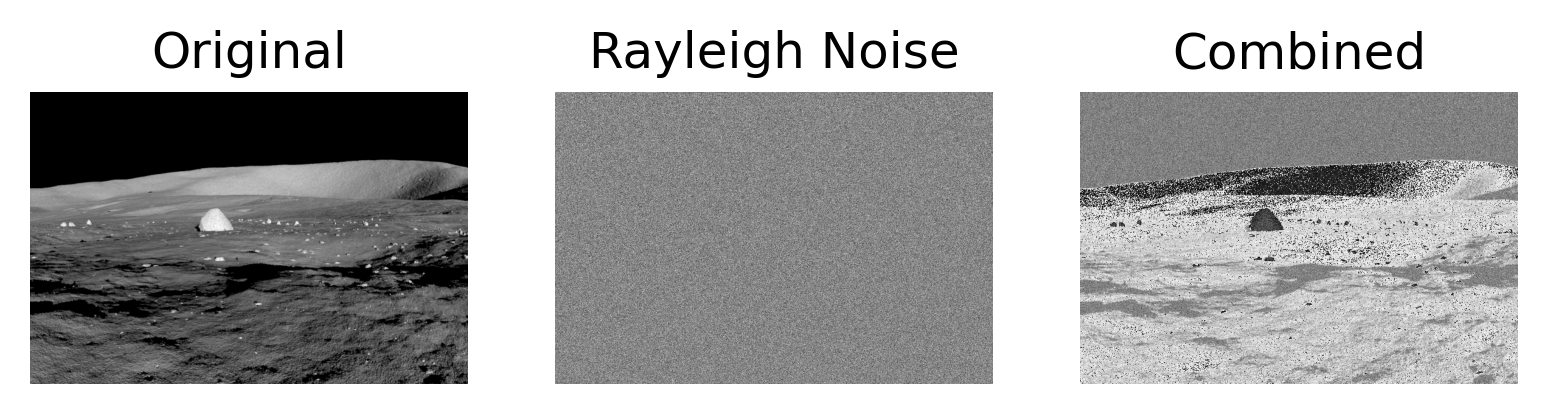

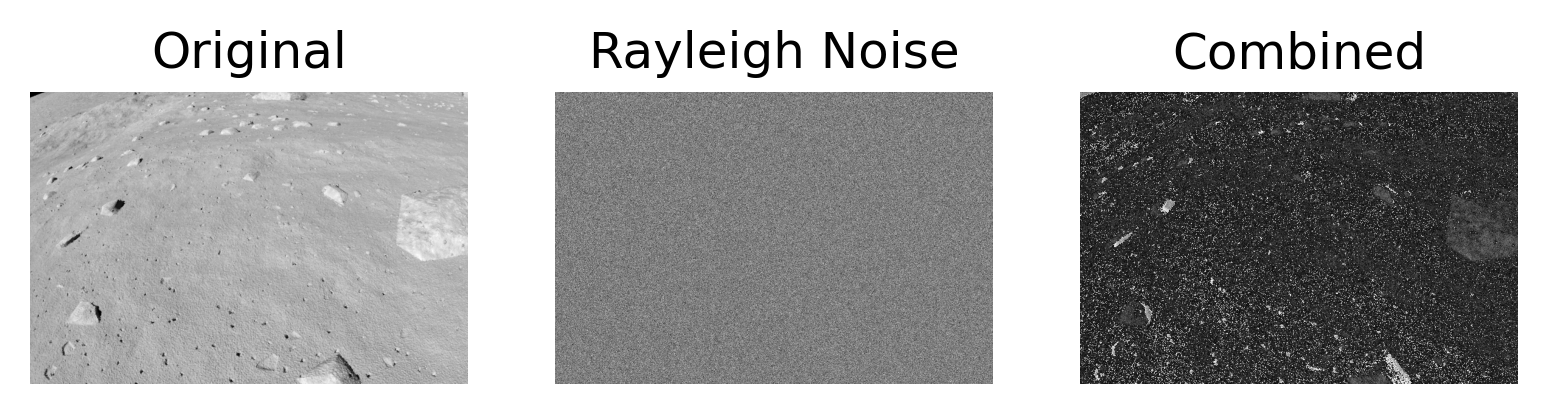

In [6]:
rayleigh_noise_images = []
for i in range(2):
    img=cv2.imread(f"render_new/image{i}.png",0)
    #Rayleigh Noise
    rn_img=img+rayleigh_noise(img,128,20)
    rayleigh_noise_images.append(rn_img)
    fig=plt.figure(dpi=300)
    fig.add_subplot(1,3,1)
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.title("Original")

    fig.add_subplot(1,3,2)
    plt.imshow(rayleigh_noise(img,128,20),cmap='gray')
    plt.axis("off")
    plt.title("Rayleigh Noise")

    fig.add_subplot(1,3,3)
    plt.imshow(rn_img,cmap='gray')
    plt.axis("off")
    plt.title("Combined")

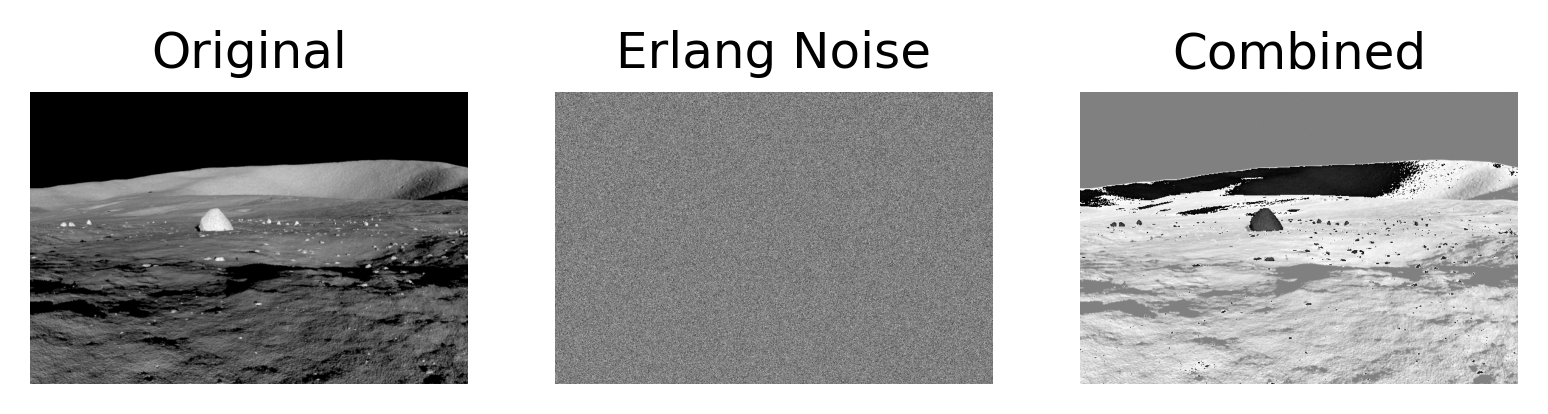

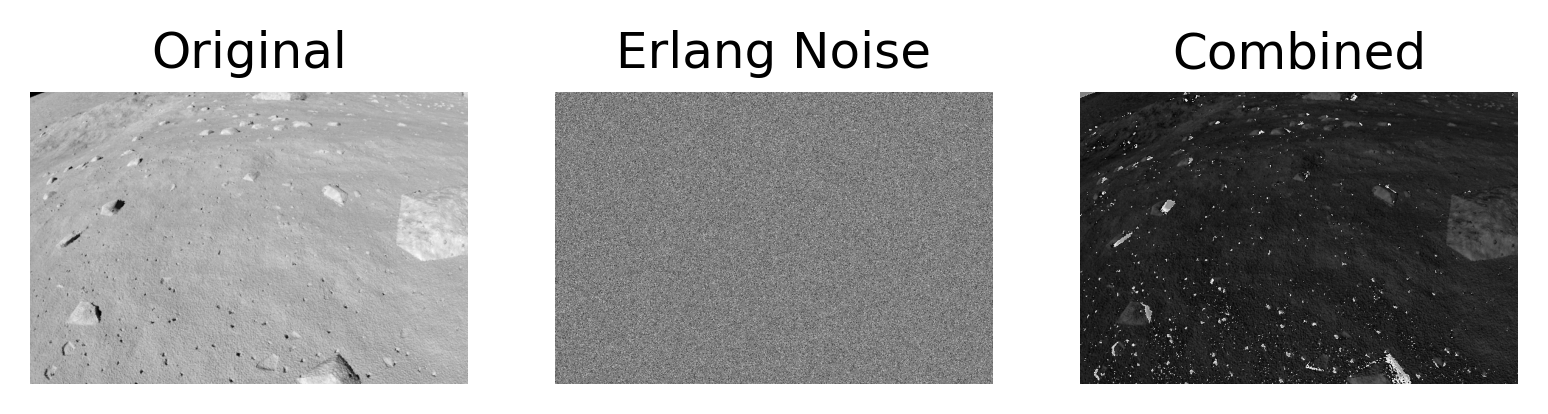

In [7]:
import scipy.stats as stats
def erlang_noise(img):
    erlang_noise = stats.erlang.rvs(5, scale=0.1, size=1000)    
    noise = np.zeros(img.shape, dtype=np.uint8)
    cv2.randn(noise, 128, erlang_noise)
    return noise

for i in range(2):
    img=cv2.imread(f"render_new/image{i}.png",0)
    #Erlang Noise
    en_img=img+erlang_noise(img)
    
    fig=plt.figure(dpi=300)
    fig.add_subplot(1,3,1)
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.title("Original")

    fig.add_subplot(1,3,2)
    plt.imshow(erlang_noise(img),cmap='gray')
    plt.axis("off")
    plt.title("Erlang Noise")

    fig.add_subplot(1,3,3)
    plt.imshow(en_img,cmap='gray')
    plt.axis("off")
    plt.title("Combined")

In [22]:
import skimage.filters as filters
import skimage.morphology as morphology
import skimage.util as util


# geometric mean filter


def geometric_mean_filter(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size))
    kernel = kernel / kernel_size ** 2
    img = np.pad(img, kernel_size // 2, mode='constant')
    img = np.array(img, dtype=np.float64)
    img_filtered = np.zeros(img.shape)
    for i in range(img.shape[0] - kernel_size + 1):
        for j in range(img.shape[1] - kernel_size + 1):
            img_filtered[i + kernel_size // 2, j + kernel_size // 2] = np.exp(np.sum(np.multiply(np.log(img[i:i + kernel_size, j:j + kernel_size]), kernel)))
    img_filtered = np.array(img_filtered, dtype=np.uint8)
    return img_filtered

# median filter

def median_filter(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size))
    kernel = kernel / kernel_size ** 2
    img = np.pad(img, kernel_size // 2, mode='constant')
    img = np.array(img, dtype=np.float64)
    img_filtered = np.zeros(img.shape)
    for i in range(img.shape[0] - kernel_size + 1):
        for j in range(img.shape[1] - kernel_size + 1):
            img_filtered[i + kernel_size // 2, j + kernel_size // 2] = np.median(img[i:i + kernel_size, j:j + kernel_size])
    img_filtered = np.array(img_filtered, dtype=np.uint8)
    return img_filtered

# harmonic mean

def harmonic_mean_filter(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size))
    kernel = kernel / kernel_size ** 2
    img = np.pad(img, kernel_size // 2, mode='constant')
    img = np.array(img, dtype=np.float64)
    img_filtered = np.zeros(img.shape)
    for i in range(img.shape[0] - kernel_size + 1):
        for j in range(img.shape[1] - kernel_size + 1):
            img_filtered[i + kernel_size // 2, j + kernel_size // 2] = kernel_size ** 2 / np.sum(np.multiply(kernel, 1 / img[i:i + kernel_size, j:j + kernel_size]))
    img_filtered = np.array(img_filtered, dtype=np.uint8)
    return img_filtered

# contraharmonic mean

def contraharmonic_mean_filter(img, kernel_size, q):
    kernel = np.ones((kernel_size, kernel_size))
    kernel = kernel / kernel_size ** 2
    img = np.pad(img, kernel_size // 2, mode='constant')
    img = np.array(img, dtype=np.float64)
    img_filtered = np.zeros(img.shape)
    for i in range(img.shape[0] - kernel_size + 1):
        for j in range(img.shape[1] - kernel_size + 1):
            img_filtered[i + kernel_size // 2, j + kernel_size // 2] = np.sum(np.multiply(kernel, img[i:i + kernel_size, j:j + kernel_size] ** (q + 1))) / np.sum(np.multiply(kernel, img[i:i + kernel_size, j:j + kernel_size] ** q))
    img_filtered = np.array(img_filtered, dtype=np.uint8)
    return img_filtered

# alpha trimmed mean

def alpha_trimmed_mean_filter(img, kernel_size, d):
    kernel = np.ones((kernel_size, kernel_size))
    kernel = kernel / kernel_size ** 2
    img = np.pad(img, kernel_size // 2, mode='constant')
    img = np.array(img, dtype=np.float64)
    img_filtered = np.zeros(img.shape)
    for i in range(img.shape[0] - kernel_size + 1):
        for j in range(img.shape[1] - kernel_size + 1):
            img_filtered[i + kernel_size // 2, j + kernel_size // 2] = np.mean(np.sort(img[i:i + kernel_size, j:j + kernel_size].flatten())[d:-d])
    img_filtered = np.array(img_filtered, dtype=np.uint8)
    return img_filtered

# total variation denoising

def total_variation_denoising(img, kernel_size, iterations):
    kernel = np.ones((kernel_size, kernel_size))
    kernel = kernel / kernel_size ** 2
    img = np.pad(img, kernel_size // 2, mode='constant')
    img = np.array(img, dtype=np.float64)
    img_filtered = np.zeros(img.shape)
    for i in range(img.shape[0] - kernel_size + 1):
        for j in range(img.shape[1] - kernel_size + 1):
            img_filtered[i + kernel_size // 2, j + kernel_size // 2] = np.mean(img[i:i + kernel_size, j:j + kernel_size])
    img_filtered = np.array(img_filtered, dtype=np.uint8)
    for i in range(iterations):
        img_filtered = np.pad(img_filtered, kernel_size // 2, mode='constant')
        img_filtered = np.array(img_filtered, dtype=np.float64)
        img_filtered_new = np.zeros(img_filtered.shape)
        for i in range(img_filtered.shape[0] - kernel_size + 1):
            for j in range(img_filtered.shape[1] - kernel_size + 1):
                img_filtered_new[i + kernel_size // 2, j + kernel_size // 2] = np.mean(img_filtered[i:i + kernel_size, j:j + kernel_size])
        img_filtered_new = np.array(img_filtered_new, dtype=np.uint8)
        img_filtered = img_filtered_new
    return img_filtered


/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:17: RuntimeWarning: divide by zero encountered in log
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = np.exp(np.sum(np.multiply(np.log(img[i:i + kernel_size, j:j + kernel_size]), kernel)))
/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:45: RuntimeWarning: divide by zero encountered in divide
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = kernel_size ** 2 / np.sum(np.multiply(kernel, 1 / img[i:i + kernel_size, j:j + kernel_size]))


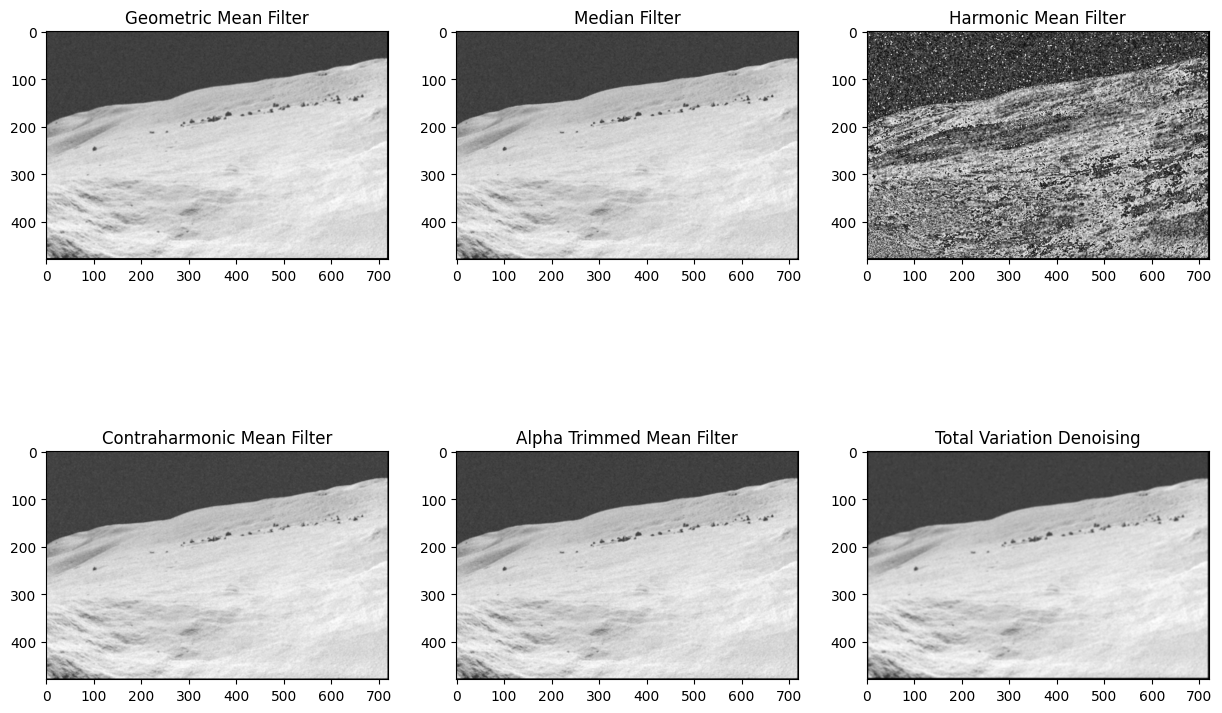

Gaussian Noise PSNR:  [12.043664400339328, 11.947912428637004, 11.697635226087112, 11.830744762721272, 12.03657312598071, 12.097354329657112]
Gaussian Noise SSIM:  [0.5319471734058778, 0.5184581985972244, 0.06031514742434875, 0.5307031429947274, 0.5301584459389935, 0.4769001661248259]
Gaussian Noise MSE:  [4061.756843171296, 4152.303773148148, 4398.623987268518, 4265.852989004629, 4068.394403935185, 4011.8522280092593]


In [23]:
import skimage.metrics as metrics

#Gaussian Noise
gnoise_gmean = geometric_mean_filter(gn_img, 3)
gnoise_median = median_filter(gn_img, 3)
gnoise_hmean = harmonic_mean_filter(gn_img, 3)
gnoise_chmean = contraharmonic_mean_filter(gn_img, 3, 1.5)
gnoise_atmean = alpha_trimmed_mean_filter(gn_img, 3, 1)
gnoise_tv = total_variation_denoising(gn_img, 3, 1)

gnoise_gmean = cv2.resize(gnoise_gmean, (720, 480))
gnoise_median = cv2.resize(gnoise_median, (720, 480))
gnoise_hmean = cv2.resize(gnoise_hmean, (720, 480))
gnoise_chmean = cv2.resize(gnoise_chmean, (720, 480))
gnoise_atmean = cv2.resize(gnoise_atmean, (720, 480))
gnoise_tv = cv2.resize(gnoise_tv, (720, 480))

# plot
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].imshow(gnoise_gmean, cmap='gray')
ax[0, 0].set_title('Geometric Mean Filter')
ax[0, 1].imshow(gnoise_median, cmap='gray')
ax[0, 1].set_title('Median Filter')
ax[0, 2].imshow(gnoise_hmean, cmap='gray')
ax[0, 2].set_title('Harmonic Mean Filter')
ax[1, 0].imshow(gnoise_chmean, cmap='gray')
ax[1, 0].set_title('Contraharmonic Mean Filter')
ax[1, 1].imshow(gnoise_atmean, cmap='gray')
ax[1, 1].set_title('Alpha Trimmed Mean Filter')
ax[1, 2].imshow(gnoise_tv, cmap='gray')
ax[1, 2].set_title('Total Variation Denoising')
plt.show()

# gaussian noise
gn_psnr = [metrics.peak_signal_noise_ratio(img, gnoise_gmean), metrics.peak_signal_noise_ratio(img, gnoise_median), metrics.peak_signal_noise_ratio(img, gnoise_hmean), metrics.peak_signal_noise_ratio(img, gnoise_chmean), metrics.peak_signal_noise_ratio(img, gnoise_atmean), metrics.peak_signal_noise_ratio(img, gnoise_tv)]
gn_ssim = [metrics.structural_similarity(img, gnoise_gmean), metrics.structural_similarity(img, gnoise_median), metrics.structural_similarity(img, gnoise_hmean), metrics.structural_similarity(img, gnoise_chmean), metrics.structural_similarity(img, gnoise_atmean), metrics.structural_similarity(img, gnoise_tv)]
gn_mse = [metrics.mean_squared_error(img, gnoise_gmean), metrics.mean_squared_error(img, gnoise_median), metrics.mean_squared_error(img, gnoise_hmean), metrics.mean_squared_error(img, gnoise_chmean), metrics.mean_squared_error(img, gnoise_atmean), metrics.mean_squared_error(img, gnoise_tv)]

print("Gaussian Noise PSNR: ", gn_psnr)
print("Gaussian Noise SSIM: ", gn_ssim)
print("Gaussian Noise MSE: ", gn_mse)


/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:17: RuntimeWarning: divide by zero encountered in log
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = np.exp(np.sum(np.multiply(np.log(img[i:i + kernel_size, j:j + kernel_size]), kernel)))
/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:45: RuntimeWarning: divide by zero encountered in divide
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = kernel_size ** 2 / np.sum(np.multiply(kernel, 1 / img[i:i + kernel_size, j:j + kernel_size]))


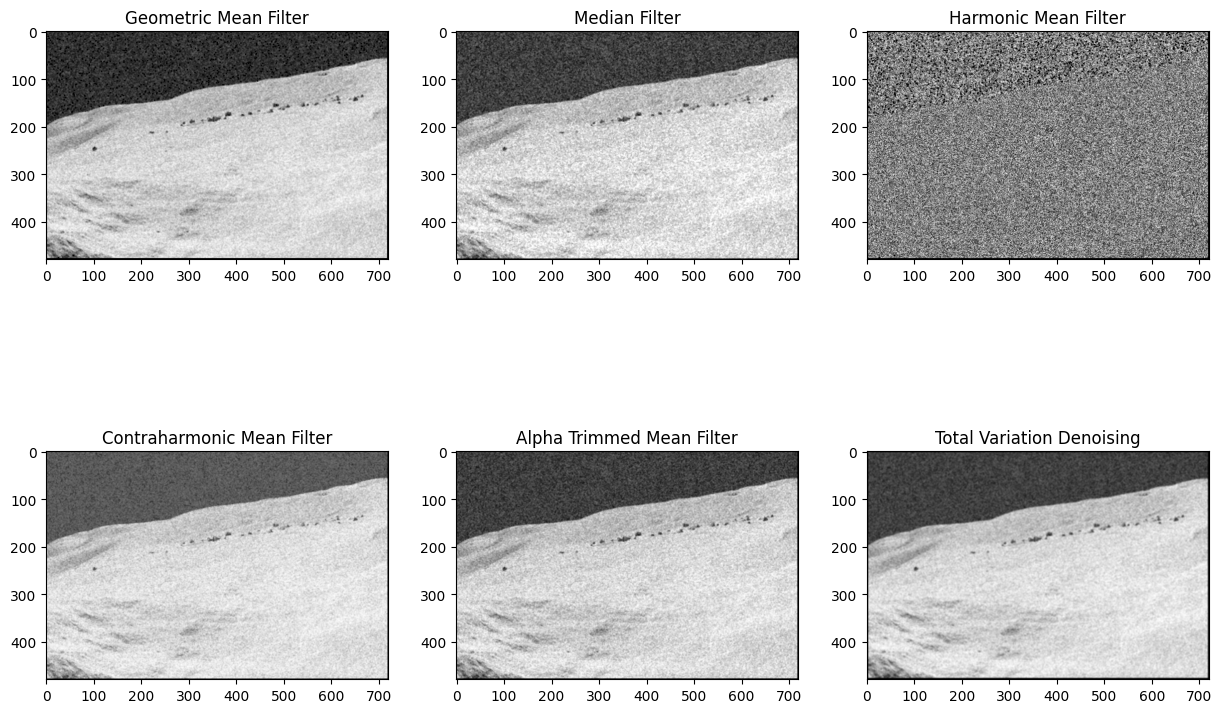

Uniform Noise PSNR:  [12.941660921998864, 11.808750100145769, 9.79883078736845, 10.63261733174876, 12.092079702764043, 12.332074627675514]
Uniform Noise SSIM:  [0.3431379853410676, 0.23297308891957205, 0.01842371801407542, 0.33823601860403346, 0.30766958978055436, 0.36344100867707796]
Uniform Noise MSE:  [3303.0433130787037, 4287.5120225694445, 6810.786744791667, 5621.065263310185, 4016.7276938657405, 3800.7814525462964]


In [24]:
# uniform noise
unoise_gmean = geometric_mean_filter(un_img, 3)
unoise_median = median_filter(un_img, 3)
unoise_hmean = harmonic_mean_filter(un_img, 3)
unoise_chmean = contraharmonic_mean_filter(un_img, 3, 1.5)
unoise_atmean = alpha_trimmed_mean_filter(un_img, 3, 1)
unoise_tv = total_variation_denoising(un_img, 3, 1)

unoise_gmean = cv2.resize(unoise_gmean, (720, 480))
unoise_median = cv2.resize(unoise_median, (720, 480))
unoise_hmean = cv2.resize(unoise_hmean, (720, 480))
unoise_chmean = cv2.resize(unoise_chmean, (720, 480))
unoise_atmean = cv2.resize(unoise_atmean, (720, 480))
unoise_tv = cv2.resize(unoise_tv, (720, 480))


# plot
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].imshow(unoise_gmean, cmap='gray')
ax[0, 0].set_title('Geometric Mean Filter')
ax[0, 1].imshow(unoise_median, cmap='gray')
ax[0, 1].set_title('Median Filter')
ax[0, 2].imshow(unoise_hmean, cmap='gray')
ax[0, 2].set_title('Harmonic Mean Filter')
ax[1, 0].imshow(unoise_chmean, cmap='gray')
ax[1, 0].set_title('Contraharmonic Mean Filter')
ax[1, 1].imshow(unoise_atmean, cmap='gray')
ax[1, 1].set_title('Alpha Trimmed Mean Filter')
ax[1, 2].imshow(unoise_tv, cmap='gray')
ax[1, 2].set_title('Total Variation Denoising')
plt.show()

# uniform noise
un_psnr = [metrics.peak_signal_noise_ratio(img, unoise_gmean), metrics.peak_signal_noise_ratio(img, unoise_median), metrics.peak_signal_noise_ratio(img, unoise_hmean), metrics.peak_signal_noise_ratio(img, unoise_chmean), metrics.peak_signal_noise_ratio(img, unoise_atmean), metrics.peak_signal_noise_ratio(img, unoise_tv)]
un_ssim = [metrics.structural_similarity(img, unoise_gmean), metrics.structural_similarity(img, unoise_median), metrics.structural_similarity(img, unoise_hmean), metrics.structural_similarity(img, unoise_chmean), metrics.structural_similarity(img, unoise_atmean), metrics.structural_similarity(img, unoise_tv)]
un_mse = [metrics.mean_squared_error(img, unoise_gmean), metrics.mean_squared_error(img, unoise_median), metrics.mean_squared_error(img, unoise_hmean), metrics.mean_squared_error(img, unoise_chmean), metrics.mean_squared_error(img, unoise_atmean), metrics.mean_squared_error(img, unoise_tv)]

print("Uniform Noise PSNR: ", un_psnr)
print("Uniform Noise SSIM: ", un_ssim)
print("Uniform Noise MSE: ", un_mse)

/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:17: RuntimeWarning: divide by zero encountered in log
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = np.exp(np.sum(np.multiply(np.log(img[i:i + kernel_size, j:j + kernel_size]), kernel)))
/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:45: RuntimeWarning: divide by zero encountered in divide
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = kernel_size ** 2 / np.sum(np.multiply(kernel, 1 / img[i:i + kernel_size, j:j + kernel_size]))
/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:59: RuntimeWarning: invalid value encountered in double_scalars
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = np.sum(np.multiply(kernel, img[i:i + kernel_size, j:j + kernel_size] ** (q + 1))) / np.sum(np.multiply(kernel, img[i:i + kernel_size, j:j + kernel_size] ** q))


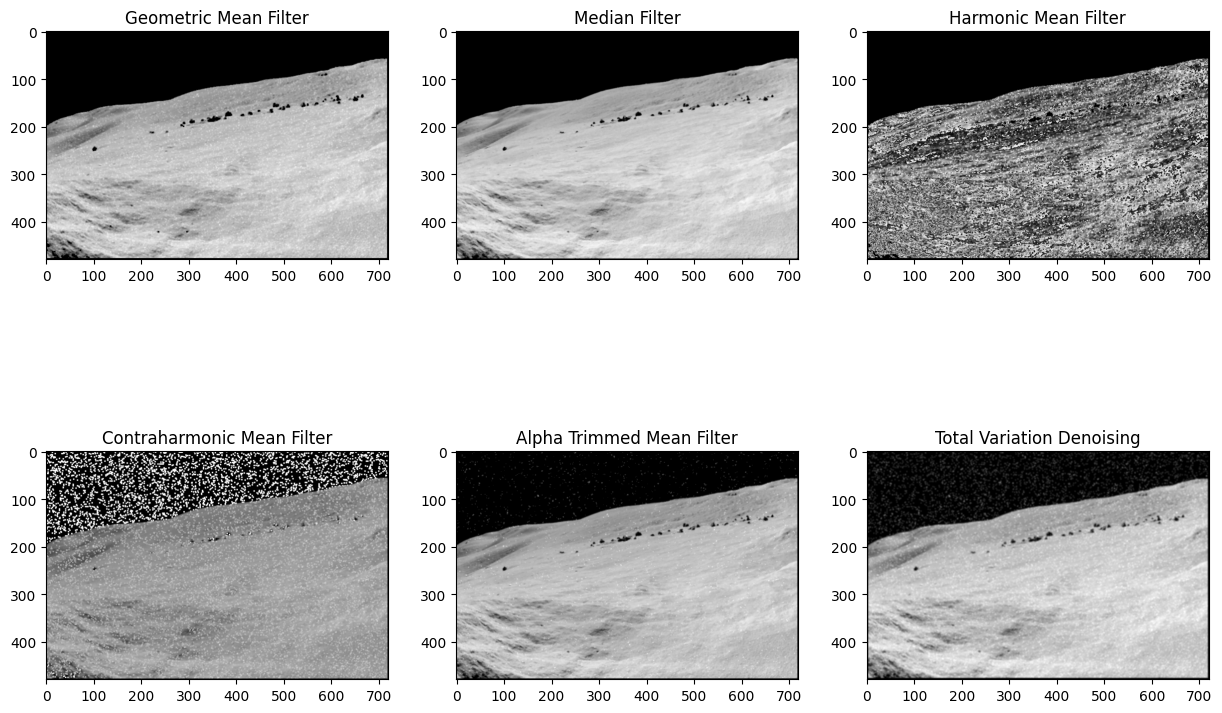

Impulse Noise PSNR:  [24.041868510570644, 26.954267452094843, 13.243804930459547, 11.971868506988718, 26.235674331268953, 23.46515005197172]
Impulse Noise SSIM:  [0.7652995186005883, 0.8445959875188754, 0.30905524902237297, 0.34373782107176937, 0.7412817240899124, 0.5015523507399473]
Impulse Noise MSE:  [256.3855295138889, 131.1153732638889, 3081.057957175926, 4129.46234375, 154.70805555555555, 292.79614583333336]


In [25]:
# impulse noise

inoise_gmean = geometric_mean_filter(in_img, 3)
inoise_median = median_filter(in_img, 3)
inoise_hmean = harmonic_mean_filter(in_img, 3)
inoise_chmean = contraharmonic_mean_filter(in_img, 3, 1.5)
inoise_atmean = alpha_trimmed_mean_filter(in_img, 3, 1)
inoise_tv = total_variation_denoising(in_img, 3, 1)

inoise_gmean = cv2.resize(inoise_gmean, (720, 480))
inoise_median = cv2.resize(inoise_median, (720, 480))
inoise_hmean = cv2.resize(inoise_hmean, (720, 480))
inoise_chmean = cv2.resize(inoise_chmean, (720, 480))
inoise_atmean = cv2.resize(inoise_atmean, (720, 480))
inoise_tv = cv2.resize(inoise_tv, (720, 480))

# plot
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].imshow(inoise_gmean, cmap='gray')
ax[0, 0].set_title('Geometric Mean Filter')
ax[0, 1].imshow(inoise_median, cmap='gray')
ax[0, 1].set_title('Median Filter')
ax[0, 2].imshow(inoise_hmean, cmap='gray')
ax[0, 2].set_title('Harmonic Mean Filter')
ax[1, 0].imshow(inoise_chmean, cmap='gray')
ax[1, 0].set_title('Contraharmonic Mean Filter')
ax[1, 1].imshow(inoise_atmean, cmap='gray')
ax[1, 1].set_title('Alpha Trimmed Mean Filter')
ax[1, 2].imshow(inoise_tv, cmap='gray')
ax[1, 2].set_title('Total Variation Denoising')
plt.show()

# impulse noise
in_psnr = [metrics.peak_signal_noise_ratio(img, inoise_gmean), metrics.peak_signal_noise_ratio(img, inoise_median), metrics.peak_signal_noise_ratio(img, inoise_hmean), metrics.peak_signal_noise_ratio(img, inoise_chmean), metrics.peak_signal_noise_ratio(img, inoise_atmean), metrics.peak_signal_noise_ratio(img, inoise_tv)]
in_ssim = [metrics.structural_similarity(img, inoise_gmean), metrics.structural_similarity(img, inoise_median), metrics.structural_similarity(img, inoise_hmean), metrics.structural_similarity(img, inoise_chmean), metrics.structural_similarity(img, inoise_atmean), metrics.structural_similarity(img, inoise_tv)]
in_mse = [metrics.mean_squared_error(img, inoise_gmean), metrics.mean_squared_error(img, inoise_median), metrics.mean_squared_error(img, inoise_hmean), metrics.mean_squared_error(img, inoise_chmean), metrics.mean_squared_error(img, inoise_atmean), metrics.mean_squared_error(img, inoise_tv)]

print("Impulse Noise PSNR: ", in_psnr)
print("Impulse Noise SSIM: ", in_ssim)
print("Impulse Noise MSE: ", in_mse)

/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:17: RuntimeWarning: divide by zero encountered in log
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = np.exp(np.sum(np.multiply(np.log(img[i:i + kernel_size, j:j + kernel_size]), kernel)))
/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:45: RuntimeWarning: divide by zero encountered in divide
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = kernel_size ** 2 / np.sum(np.multiply(kernel, 1 / img[i:i + kernel_size, j:j + kernel_size]))
/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:59: RuntimeWarning: invalid value encountered in double_scalars
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = np.sum(np.multiply(kernel, img[i:i + kernel_size, j:j + kernel_size] ** (q + 1))) / np.sum(np.multiply(kernel, img[i:i + kernel_size, j:j + kernel_size] ** q))


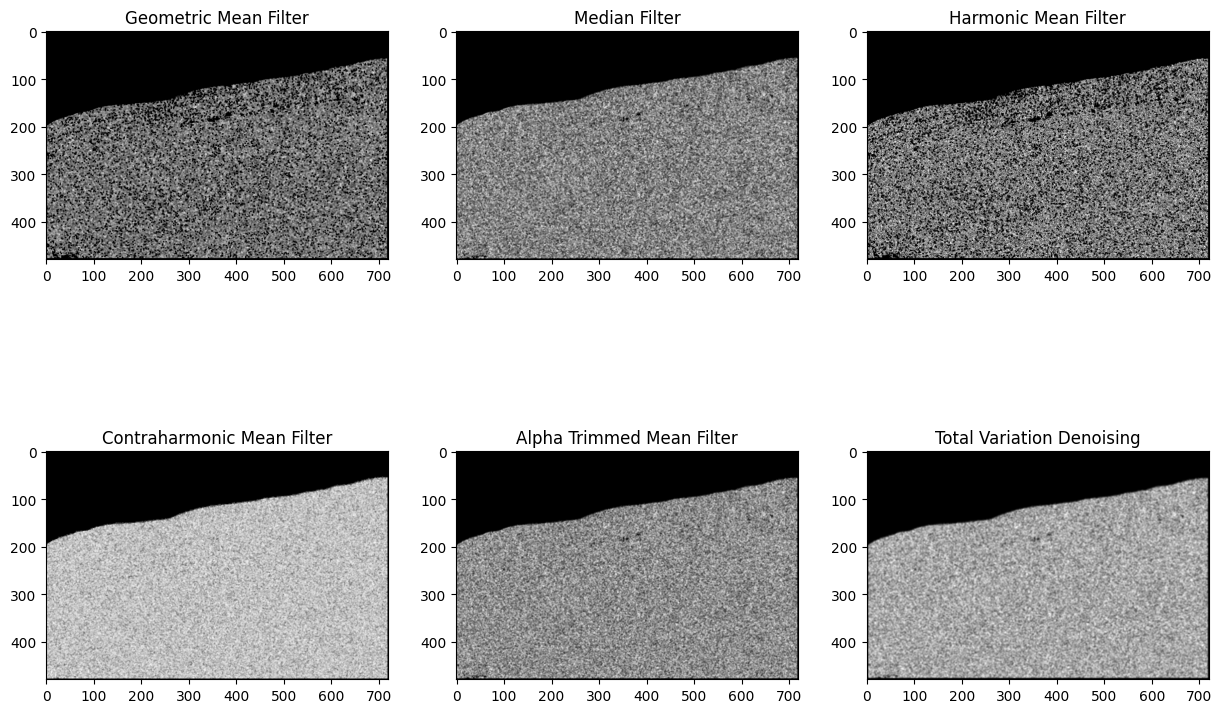

Speckle Noise PSNR:  [11.761622233657214, 16.23321642312851, 11.777913204016603, 16.35362789021028, 17.29092635207166, 18.070500052577117]
Speckle Noise SSIM:  [0.28275098540628046, 0.29757867803801086, 0.2621097266018994, 0.34483316316778356, 0.3215990422651067, 0.3924027092289201]
Speckle Noise MSE:  [4334.291712962963, 1547.9563802083333, 4318.063657407408, 1505.6276157407408, 1213.3545572916667, 1013.9822569444444]


In [26]:
# speckle noise

snoise_gmean = geometric_mean_filter(speck, 3)
snoise_median = median_filter(speck, 3)
snoise_hmean = harmonic_mean_filter(speck, 3)
snoise_chmean = contraharmonic_mean_filter(speck, 3, 1.5)
snoise_atmean = alpha_trimmed_mean_filter(speck, 3, 1)
snoise_tv = total_variation_denoising(speck, 3, 1)

snoise_gmean = cv2.resize(snoise_gmean, (720, 480))
snoise_median = cv2.resize(snoise_median, (720, 480))
snoise_hmean = cv2.resize(snoise_hmean, (720, 480))
snoise_chmean = cv2.resize(snoise_chmean, (720, 480))
snoise_atmean = cv2.resize(snoise_atmean, (720, 480))
snoise_tv = cv2.resize(snoise_tv, (720, 480))


# plot
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].imshow(snoise_gmean, cmap='gray')
ax[0, 0].set_title('Geometric Mean Filter')
ax[0, 1].imshow(snoise_median, cmap='gray')
ax[0, 1].set_title('Median Filter')
ax[0, 2].imshow(snoise_hmean, cmap='gray')
ax[0, 2].set_title('Harmonic Mean Filter')
ax[1, 0].imshow(snoise_chmean, cmap='gray')
ax[1, 0].set_title('Contraharmonic Mean Filter')
ax[1, 1].imshow(snoise_atmean, cmap='gray')
ax[1, 1].set_title('Alpha Trimmed Mean Filter')
ax[1, 2].imshow(snoise_tv, cmap='gray')
ax[1, 2].set_title('Total Variation Denoising')
plt.show()

# speckle noise
s_psnr = [metrics.peak_signal_noise_ratio(img, snoise_gmean), metrics.peak_signal_noise_ratio(img, snoise_median), metrics.peak_signal_noise_ratio(img, snoise_hmean), metrics.peak_signal_noise_ratio(img, snoise_chmean), metrics.peak_signal_noise_ratio(img, snoise_atmean), metrics.peak_signal_noise_ratio(img, snoise_tv)]
s_ssim = [metrics.structural_similarity(img, snoise_gmean), metrics.structural_similarity(img, snoise_median), metrics.structural_similarity(img, snoise_hmean), metrics.structural_similarity(img, snoise_chmean), metrics.structural_similarity(img, snoise_atmean), metrics.structural_similarity(img, snoise_tv)]
s_mse = [metrics.mean_squared_error(img, snoise_gmean), metrics.mean_squared_error(img, snoise_median), metrics.mean_squared_error(img, snoise_hmean), metrics.mean_squared_error(img, snoise_chmean), metrics.mean_squared_error(img, snoise_atmean), metrics.mean_squared_error(img, snoise_tv)]

print("Speckle Noise PSNR: ", s_psnr)
print("Speckle Noise SSIM: ", s_ssim)
print("Speckle Noise MSE: ", s_mse)


/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:17: RuntimeWarning: divide by zero encountered in log
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = np.exp(np.sum(np.multiply(np.log(img[i:i + kernel_size, j:j + kernel_size]), kernel)))
/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:45: RuntimeWarning: divide by zero encountered in divide
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = kernel_size ** 2 / np.sum(np.multiply(kernel, 1 / img[i:i + kernel_size, j:j + kernel_size]))


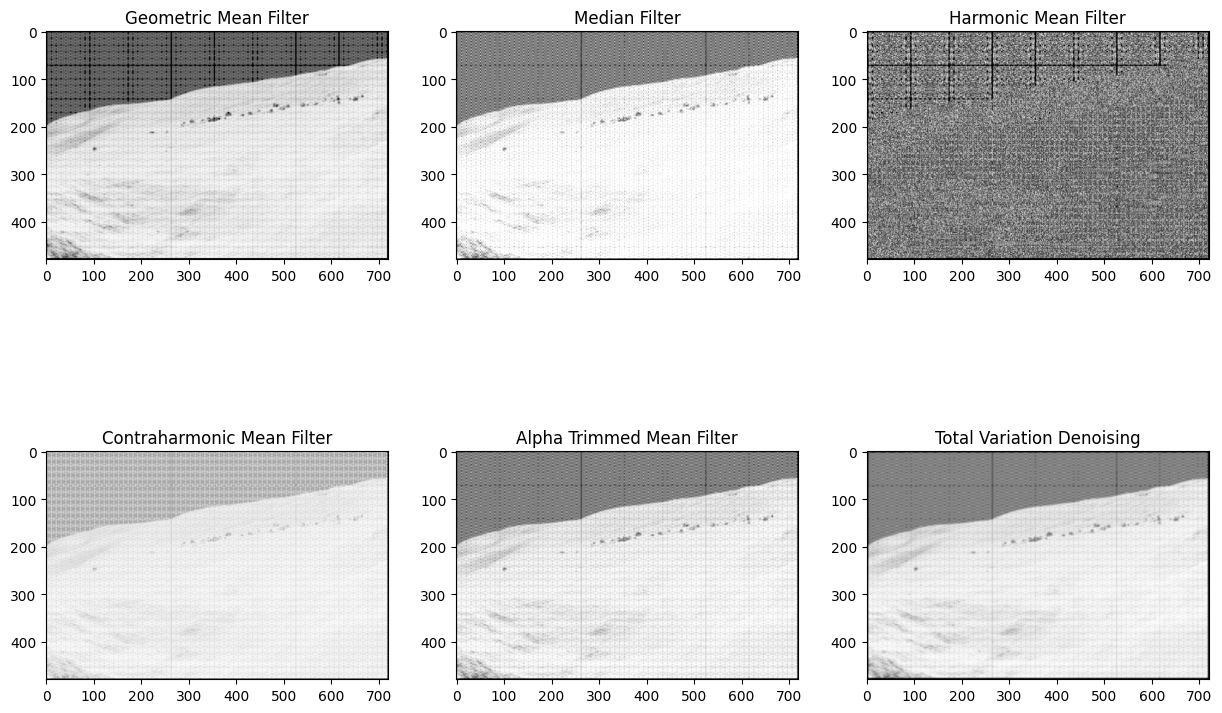

Periodic Noise PSNR:  [9.683744512930742, 7.406438026579508, 9.627543158771775, 6.366499965458202, 8.15690781660683, 8.591924404258812]
Periodic Noise SSIM:  [0.27826475532906436, 0.1867575879098187, 0.01551525543931367, 0.2978199530262003, 0.2422792166425007, 0.32181739146527083]
Periodic Noise MSE:  [6993.682456597222, 11815.07705150463, 7084.774716435185, 15011.716854745371, 9940.073122106482, 8992.654756944445]


In [27]:
# periodic noise

pnoise_gmean = geometric_mean_filter(pn_img, 3)
pnoise_median = median_filter(pn_img, 3)
pnoise_hmean = harmonic_mean_filter(pn_img, 3)
pnoise_chmean = contraharmonic_mean_filter(pn_img, 3, 1.5)
pnoise_atmean = alpha_trimmed_mean_filter(pn_img, 3, 1)
pnoise_tv = total_variation_denoising(pn_img, 3, 1)

pnoise_gmean = cv2.resize(pnoise_gmean, (720, 480))
pnoise_median = cv2.resize(pnoise_median, (720, 480))
pnoise_hmean = cv2.resize(pnoise_hmean, (720, 480))
pnoise_chmean = cv2.resize(pnoise_chmean, (720, 480))
pnoise_atmean = cv2.resize(pnoise_atmean, (720, 480))
pnoise_tv = cv2.resize(pnoise_tv, (720, 480))

# plot
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].imshow(pnoise_gmean, cmap='gray')
ax[0, 0].set_title('Geometric Mean Filter')
ax[0, 1].imshow(pnoise_median, cmap='gray')
ax[0, 1].set_title('Median Filter')
ax[0, 2].imshow(pnoise_hmean, cmap='gray')
ax[0, 2].set_title('Harmonic Mean Filter')
ax[1, 0].imshow(pnoise_chmean, cmap='gray')
ax[1, 0].set_title('Contraharmonic Mean Filter')
ax[1, 1].imshow(pnoise_atmean, cmap='gray')
ax[1, 1].set_title('Alpha Trimmed Mean Filter')
ax[1, 2].imshow(pnoise_tv, cmap='gray')
ax[1, 2].set_title('Total Variation Denoising')
plt.show()

# periodic noiseq
p_psnr = [metrics.peak_signal_noise_ratio(img, pnoise_gmean), metrics.peak_signal_noise_ratio(img, pnoise_median), metrics.peak_signal_noise_ratio(img, pnoise_hmean), metrics.peak_signal_noise_ratio(img, pnoise_chmean), metrics.peak_signal_noise_ratio(img, pnoise_atmean), metrics.peak_signal_noise_ratio(img, pnoise_tv)]
p_ssim = [metrics.structural_similarity(img, pnoise_gmean), metrics.structural_similarity(img, pnoise_median), metrics.structural_similarity(img, pnoise_hmean), metrics.structural_similarity(img, pnoise_chmean), metrics.structural_similarity(img, pnoise_atmean), metrics.structural_similarity(img, pnoise_tv)]
p_mse = [metrics.mean_squared_error(img, pnoise_gmean), metrics.mean_squared_error(img, pnoise_median), metrics.mean_squared_error(img, pnoise_hmean), metrics.mean_squared_error(img, pnoise_chmean), metrics.mean_squared_error(img, pnoise_atmean), metrics.mean_squared_error(img, pnoise_tv)]

print("Periodic Noise PSNR: ", p_psnr)
print("Periodic Noise SSIM: ", p_ssim)
print("Periodic Noise MSE: ", p_mse)


/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:17: RuntimeWarning: divide by zero encountered in log
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = np.exp(np.sum(np.multiply(np.log(img[i:i + kernel_size, j:j + kernel_size]), kernel)))
/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:45: RuntimeWarning: divide by zero encountered in divide
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = kernel_size ** 2 / np.sum(np.multiply(kernel, 1 / img[i:i + kernel_size, j:j + kernel_size]))


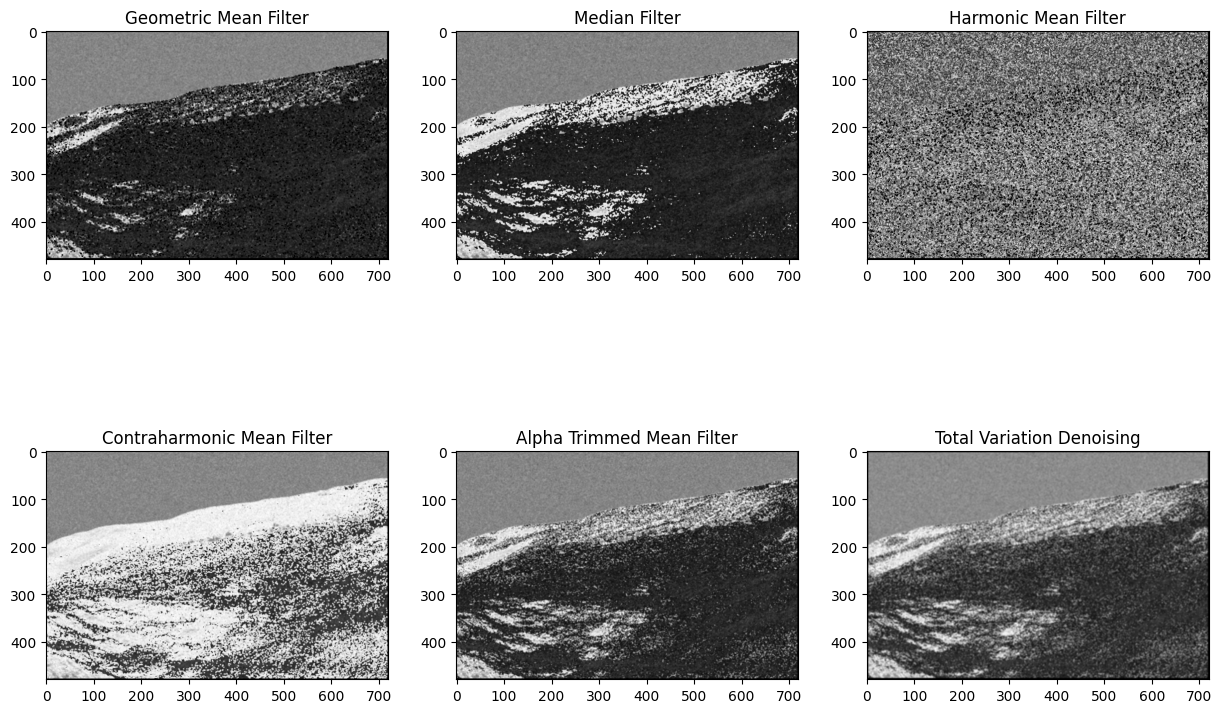

Rayleigh Noise PSNR:  [6.775089154733381, 6.70396966664327, 9.456320254980838, 8.01871533599851, 7.402403842668567, 8.017687314760185]
Rayleigh Noise SSIM:  [0.027056597709623573, 0.06540187307482898, 0.014620371790031146, 0.031899372190026185, 0.0037582334736554856, 0.016931163794481785]
Rayleigh Noise MSE:  [13663.798391203703, 13889.397086226852, 7369.674988425926, 10261.452219328703, 11826.057236689814, 10263.88150173611]


In [28]:
# rayleigh noise

rnoise_gmean = geometric_mean_filter(rn_img, 3)
rnoise_median = median_filter(rn_img, 3)
rnoise_hmean = harmonic_mean_filter(rn_img, 3)
rnoise_chmean = contraharmonic_mean_filter(rn_img, 3, 1.5)
rnoise_atmean = alpha_trimmed_mean_filter(rn_img, 3, 1)
rnoise_tv = total_variation_denoising(rn_img, 3, 1)

rnoise_gmean = cv2.resize(rnoise_gmean, (720, 480))
rnoise_median = cv2.resize(rnoise_median, (720, 480))
rnoise_hmean = cv2.resize(rnoise_hmean, (720, 480))
rnoise_chmean = cv2.resize(rnoise_chmean, (720, 480))
rnoise_atmean = cv2.resize(rnoise_atmean, (720, 480))
rnoise_tv = cv2.resize(rnoise_tv, (720, 480))

# plot
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].imshow(rnoise_gmean, cmap='gray')
ax[0, 0].set_title('Geometric Mean Filter')
ax[0, 1].imshow(rnoise_median, cmap='gray')
ax[0, 1].set_title('Median Filter')
ax[0, 2].imshow(rnoise_hmean, cmap='gray')
ax[0, 2].set_title('Harmonic Mean Filter')
ax[1, 0].imshow(rnoise_chmean, cmap='gray')
ax[1, 0].set_title('Contraharmonic Mean Filter')
ax[1, 1].imshow(rnoise_atmean, cmap='gray')
ax[1, 1].set_title('Alpha Trimmed Mean Filter')
ax[1, 2].imshow(rnoise_tv, cmap='gray')
ax[1, 2].set_title('Total Variation Denoising')
plt.show()

# rayleigh noise
r_psnr = [metrics.peak_signal_noise_ratio(img, rnoise_gmean), metrics.peak_signal_noise_ratio(img, rnoise_median), metrics.peak_signal_noise_ratio(img, rnoise_hmean), metrics.peak_signal_noise_ratio(img, rnoise_chmean), metrics.peak_signal_noise_ratio(img, rnoise_atmean), metrics.peak_signal_noise_ratio(img, rnoise_tv)]
r_ssim = [metrics.structural_similarity(img, rnoise_gmean), metrics.structural_similarity(img, rnoise_median), metrics.structural_similarity(img, rnoise_hmean), metrics.structural_similarity(img, rnoise_chmean), metrics.structural_similarity(img, rnoise_atmean), metrics.structural_similarity(img, rnoise_tv)]
r_mse = [metrics.mean_squared_error(img, rnoise_gmean), metrics.mean_squared_error(img, rnoise_median), metrics.mean_squared_error(img, rnoise_hmean), metrics.mean_squared_error(img, rnoise_chmean), metrics.mean_squared_error(img, rnoise_atmean), metrics.mean_squared_error(img, rnoise_tv)]

print("Rayleigh Noise PSNR: ", r_psnr)
print("Rayleigh Noise SSIM: ", r_ssim)
print("Rayleigh Noise MSE: ", r_mse)

/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:17: RuntimeWarning: divide by zero encountered in log
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = np.exp(np.sum(np.multiply(np.log(img[i:i + kernel_size, j:j + kernel_size]), kernel)))
/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_28910/3374043008.py:45: RuntimeWarning: divide by zero encountered in divide
  img_filtered[i + kernel_size // 2, j + kernel_size // 2] = kernel_size ** 2 / np.sum(np.multiply(kernel, 1 / img[i:i + kernel_size, j:j + kernel_size]))


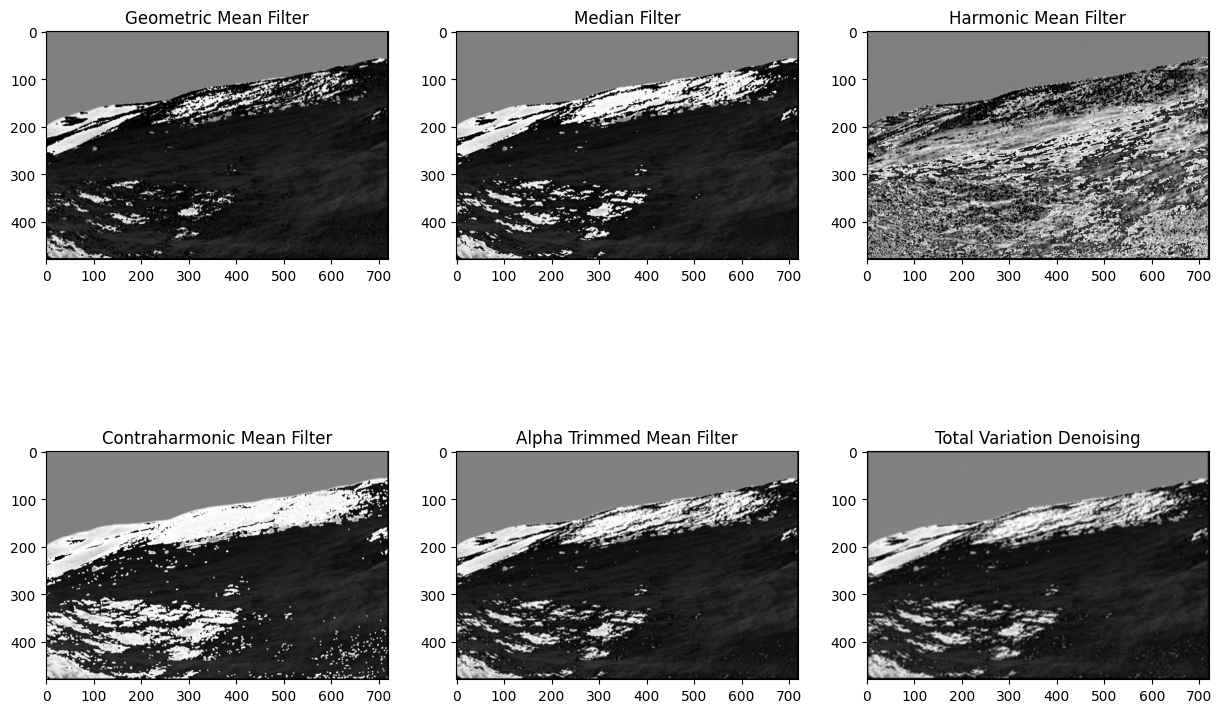

Erlang Noise PSNR:  [6.248703481794754, 6.194099106352785, 8.866187946396588, 6.323012301731353, 6.412463720215263, 6.627082399904562]
Erlang Noise SSIM:  [0.10318205125498218, 0.12452406071982315, 0.04608119204876676, 0.13375935087228982, 0.09575164631856214, 0.07749683033594126]
Erlang Noise MSE:  [15424.461565393518, 15619.619505208333, 8442.315266203705, 15162.790367476851, 14853.677447916667, 14137.483819444444]


In [29]:
# erlang noise

enoise_gmean = geometric_mean_filter(en_img, 3)
enoise_median = median_filter(en_img, 3)
enoise_hmean = harmonic_mean_filter(en_img, 3)
enoise_chmean = contraharmonic_mean_filter(en_img, 3, 1.5)
enoise_atmean = alpha_trimmed_mean_filter(en_img, 3, 1)
enoise_tv = total_variation_denoising(en_img, 3, 1)

enoise_gmean = cv2.resize(enoise_gmean, (720, 480))
enoise_median = cv2.resize(enoise_median, (720, 480))
enoise_hmean = cv2.resize(enoise_hmean, (720, 480))
enoise_chmean = cv2.resize(enoise_chmean, (720, 480))
enoise_atmean = cv2.resize(enoise_atmean, (720, 480))
enoise_tv = cv2.resize(enoise_tv, (720, 480))

# plot
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].imshow(enoise_gmean, cmap='gray')
ax[0, 0].set_title('Geometric Mean Filter')
ax[0, 1].imshow(enoise_median, cmap='gray')
ax[0, 1].set_title('Median Filter')
ax[0, 2].imshow(enoise_hmean, cmap='gray')
ax[0, 2].set_title('Harmonic Mean Filter')
ax[1, 0].imshow(enoise_chmean, cmap='gray')
ax[1, 0].set_title('Contraharmonic Mean Filter')
ax[1, 1].imshow(enoise_atmean, cmap='gray')
ax[1, 1].set_title('Alpha Trimmed Mean Filter')
ax[1, 2].imshow(enoise_tv, cmap='gray')
ax[1, 2].set_title('Total Variation Denoising')
plt.show()

# erlang noise
e_psnr = [metrics.peak_signal_noise_ratio(img, enoise_gmean), metrics.peak_signal_noise_ratio(img, enoise_median), metrics.peak_signal_noise_ratio(img, enoise_hmean), metrics.peak_signal_noise_ratio(img, enoise_chmean), metrics.peak_signal_noise_ratio(img, enoise_atmean), metrics.peak_signal_noise_ratio(img, enoise_tv)]
e_ssim = [metrics.structural_similarity(img, enoise_gmean), metrics.structural_similarity(img, enoise_median), metrics.structural_similarity(img, enoise_hmean), metrics.structural_similarity(img, enoise_chmean), metrics.structural_similarity(img, enoise_atmean), metrics.structural_similarity(img, enoise_tv)]
e_mse = [metrics.mean_squared_error(img, enoise_gmean), metrics.mean_squared_error(img, enoise_median), metrics.mean_squared_error(img, enoise_hmean), metrics.mean_squared_error(img, enoise_chmean), metrics.mean_squared_error(img, enoise_atmean), metrics.mean_squared_error(img, enoise_tv)]

print("Erlang Noise PSNR: ", e_psnr)
print("Erlang Noise SSIM: ", e_ssim)
print("Erlang Noise MSE: ", e_mse)

In [30]:
# tabulate all the results in a dataframe
import pandas as pd

df = pd.DataFrame({'Noise Type': ['Gaussian', 'Uniform', 'Impulse', 'Speckle', 'Periodic', 'Rayleigh', 'Erlang'], 'Geometric Mean Filter PSNR': [gn_psnr[0], r_psnr[0], e_psnr[0], p_psnr[0], in_psnr[0], s_psnr[0], un_psnr[0]], 'Median Filter PSNR': [gn_psnr[1], r_psnr[1], e_psnr[1], p_psnr[1], in_psnr[1], s_psnr[1], un_psnr[1]], 'Harmonic Mean Filter PSNR': [gn_psnr[2], r_psnr[2], e_psnr[2], p_psnr[2], in_psnr[2], s_psnr[2], un_psnr[2]], 'Contraharmonic Mean Filter PSNR': [gn_psnr[3], r_psnr[3], e_psnr[3], p_psnr[3], in_psnr[3], s_psnr[3], un_psnr[3]], 'Alpha Trimmed Mean Filter PSNR': [gn_psnr[4], r_psnr[4], e_psnr[4], p_psnr[4], in_psnr[4], s_psnr[4], un_psnr[4]], 'Total Variation Denoising PSNR': [gn_psnr[5], r_psnr[5], e_psnr[5], p_psnr[5], in_psnr[5], s_psnr[5], un_psnr[5]]})

In [31]:
df

Noise Type  Geometric Mean Filter PSNR  Median Filter PSNR  \
0   Gaussian                   12.043664           11.947912   
1    Uniform                    6.775089            6.703970   
2    Impulse                    6.248703            6.194099   
3    Speckle                    9.683745            7.406438   
4   Periodic                   24.041869           26.954267   
5   Rayleigh                   11.761622           16.233216   
6     Erlang                   12.941661           11.808750   

   Harmonic Mean Filter PSNR  Contraharmonic Mean Filter PSNR  \
0                  11.697635                        11.830745   
1                   9.456320                         8.018715   
2                   8.866188                         6.323012   
3                   9.627543                         6.366500   
4                  13.243805                        11.971869   
5                  11.777913                        16.353628   
6                   9.798831                        10.632617   

   Alpha Trimmed Mean Filter PSNR  Total Variation Denoising PSNR  
0                       12.036573                       12.097354  
1                        7.402404                        8.017687  
2                        6.412464                        6.627082  
3                        8.156908                        8.591924  
4                       26.235674                       23.465150  
5                       17.290926                       18.070500  
6                       12.092080                       12.332075

In [32]:
# find the best filter for each noise type
df['Best Filter'] = df.iloc[:, 1:7].idxmax(axis=1)
df[['Noise Type', 'Best Filter']]


Noise Type                     Best Filter
0   Gaussian  Total Variation Denoising PSNR
1    Uniform       Harmonic Mean Filter PSNR
2    Impulse       Harmonic Mean Filter PSNR
3    Speckle      Geometric Mean Filter PSNR
4   Periodic              Median Filter PSNR
5   Rayleigh  Total Variation Denoising PSNR
6     Erlang      Geometric Mean Filter PSNR

In [33]:
# ssim

df2 = pd.DataFrame({'Noise Type': ['Gaussian', 'Uniform', 'Impulse', 'Speckle', 'Periodic', 'Rayleigh', 'Erlang'], 'Geometric Mean Filter SSIM': [gn_ssim[0], r_ssim[0], e_ssim[0], p_ssim[0], in_ssim[0], s_ssim[0], un_ssim[0]], 'Median Filter SSIM': [gn_ssim[1], r_ssim[1], e_ssim[1], p_ssim[1], in_ssim[1], s_ssim[1], un_ssim[1]], 'Harmonic Mean Filter SSIM': [gn_ssim[2], r_ssim[2], e_ssim[2], p_ssim[2], in_ssim[2], s_ssim[2], un_ssim[2]], 'Contraharmonic Mean Filter SSIM': [gn_ssim[3], r_ssim[3], e_ssim[3], p_ssim[3], in_ssim[3], s_ssim[3], un_ssim[3]], 'Alpha Trimmed Mean Filter SSIM': [gn_ssim[4], r_ssim[4], e_ssim[4], p_ssim[4], in_ssim[4], s_ssim[4], un_ssim[4]], 'Total Variation Denoising SSIM': [gn_ssim[5], r_ssim[5], e_ssim[5], p_ssim[5], in_ssim[5], s_ssim[5], un_ssim[5]]})

In [34]:
df2

Noise Type  Geometric Mean Filter SSIM  Median Filter SSIM  \
0   Gaussian                    0.531947            0.518458   
1    Uniform                    0.027057            0.065402   
2    Impulse                    0.103182            0.124524   
3    Speckle                    0.278265            0.186758   
4   Periodic                    0.765300            0.844596   
5   Rayleigh                    0.282751            0.297579   
6     Erlang                    0.343138            0.232973   

   Harmonic Mean Filter SSIM  Contraharmonic Mean Filter SSIM  \
0                   0.060315                         0.530703   
1                   0.014620                         0.031899   
2                   0.046081                         0.133759   
3                   0.015515                         0.297820   
4                   0.309055                         0.343738   
5                   0.262110                         0.344833   
6                   0.018424                         0.338236   

   Alpha Trimmed Mean Filter SSIM  Total Variation Denoising SSIM  
0                        0.530158                        0.476900  
1                        0.003758                        0.016931  
2                        0.095752                        0.077497  
3                        0.242279                        0.321817  
4                        0.741282                        0.501552  
5                        0.321599                        0.392403  
6                        0.307670                        0.363441

In [35]:
# find the best filter for each noise type
df2['Best Filter'] = df2.iloc[:, 1:7].idxmax(axis=1)
df2[['Noise Type', 'Best Filter']]

Noise Type                      Best Filter
0   Gaussian       Geometric Mean Filter SSIM
1    Uniform               Median Filter SSIM
2    Impulse  Contraharmonic Mean Filter SSIM
3    Speckle   Total Variation Denoising SSIM
4   Periodic               Median Filter SSIM
5   Rayleigh   Total Variation Denoising SSIM
6     Erlang   Total Variation Denoising SSIM